In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 데이터 파일 이름
filename = r"D:\Project\OPPM_Scale\dataset\04_ETTh1Dataset.csv"

# 탭으로 구분된 데이터 파일을 읽어 DataFrame으로 로드
df = pd.read_csv(filename)

T = (df['OT'] * 1000).astype(int).to_numpy()
print(T)

print('T.size(): ' + str(len(T)))

[30531 27787 27787 ... 10270  9777  9567]
T.size(): 17420


In [3]:
import matplotlib.pyplot as plt

# k 값의 범위 설정
k_values = [2, 3, 4, 5]

# 데이터를 저장할 리스트 초기화
pattern_data_list = []
oppm_data_list = []
soppm_data_list = []

for k in k_values:
    # 각 파일명 생성
    pattern_filename = f"result/resultPattern-{k}.txt"
    oppm_filename = f"result/resultOPPM-{k}.txt"
    soppm_filename = f"result/resultSOPPM-{k}.txt"

    # resultPattern-k.txt 파일 읽기
    with open(pattern_filename, 'r') as pattern_file:
        pattern_data = pattern_file.read().splitlines()
        pattern_data_strip = [x.strip() for x in pattern_data]
        pattern_data_list.append(pattern_data_strip)

    # resultOPPM-k.txt 파일 읽기
    with open(oppm_filename, 'r') as oppm_file:
        oppm_data = [int(line.strip()) for line in oppm_file]
        oppm_data_list.append(oppm_data)

    # resultSOPPM-k.txt 파일 읽기
    with open(soppm_filename, 'r') as soppm_file:
        soppm_data = [int(line.strip()) for line in soppm_file]
        soppm_data_list.append(soppm_data)

In [4]:
pattern_data_list

[['2 4', '4 2'],
 ['2 4 6', '2 6 4', '4 2 6', '4 6 2', '6 2 4', '6 4 2'],
 ['2 4 6 8',
  '2 4 8 6',
  '2 6 4 8',
  '2 6 8 4',
  '2 8 4 6',
  '2 8 6 4',
  '4 2 6 8',
  '4 2 8 6',
  '4 6 2 8',
  '4 6 8 2',
  '4 8 2 6',
  '4 8 6 2',
  '6 2 4 8',
  '6 2 8 4',
  '6 4 2 8',
  '6 4 8 2',
  '6 8 2 4',
  '6 8 4 2',
  '8 2 4 6',
  '8 2 6 4',
  '8 4 2 6',
  '8 4 6 2',
  '8 6 2 4',
  '8 6 4 2'],
 ['2 4 6 8 10',
  '2 4 6 10 8',
  '2 4 8 6 10',
  '2 4 8 10 6',
  '2 4 10 6 8',
  '2 4 10 8 6',
  '2 6 4 8 10',
  '2 6 4 10 8',
  '2 6 8 4 10',
  '2 6 8 10 4',
  '2 6 10 4 8',
  '2 6 10 8 4',
  '2 8 4 6 10',
  '2 8 4 10 6',
  '2 8 6 4 10',
  '2 8 6 10 4',
  '2 8 10 4 6',
  '2 8 10 6 4',
  '2 10 4 6 8',
  '2 10 4 8 6',
  '2 10 6 4 8',
  '2 10 6 8 4',
  '2 10 8 4 6',
  '2 10 8 6 4',
  '4 2 6 8 10',
  '4 2 6 10 8',
  '4 2 8 6 10',
  '4 2 8 10 6',
  '4 2 10 6 8',
  '4 2 10 8 6',
  '4 6 2 8 10',
  '4 6 2 10 8',
  '4 6 8 2 10',
  '4 6 8 10 2',
  '4 6 10 2 8',
  '4 6 10 8 2',
  '4 8 2 6 10',
  '4 8 2 10 6',
  '4 

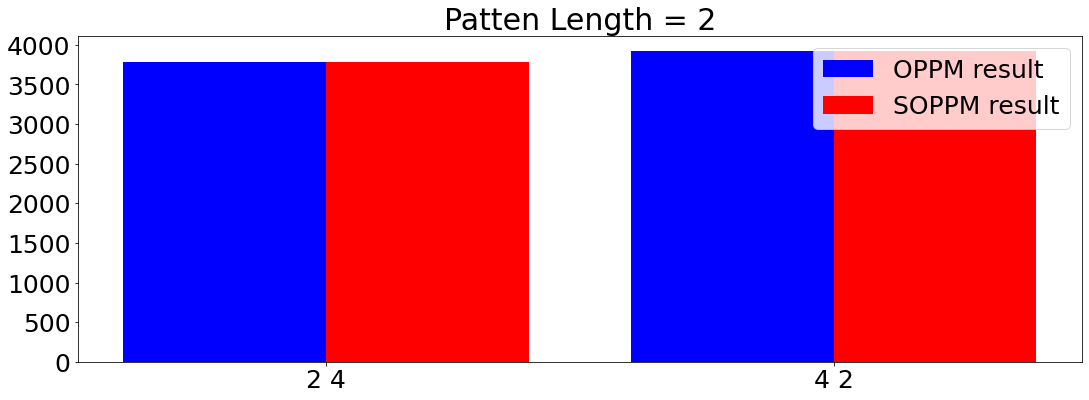

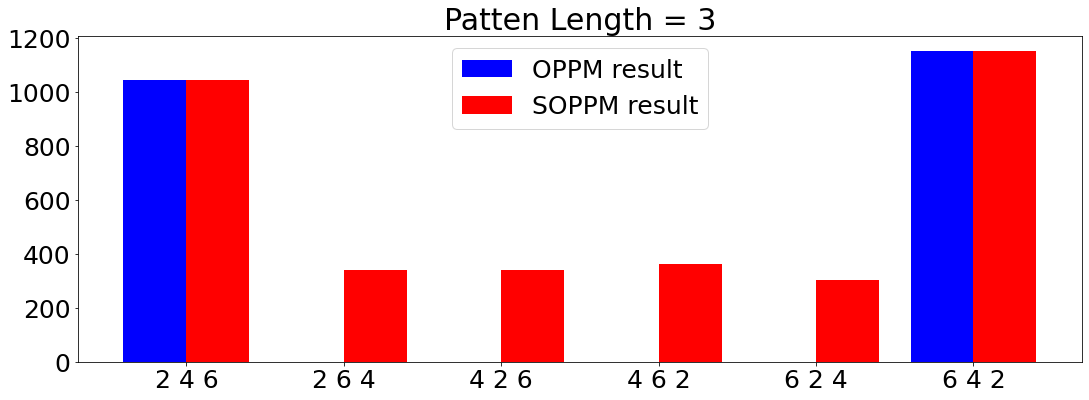

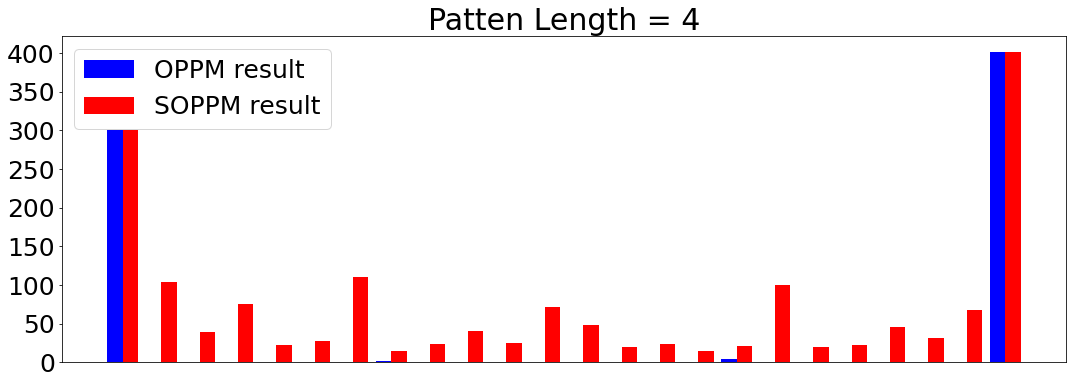

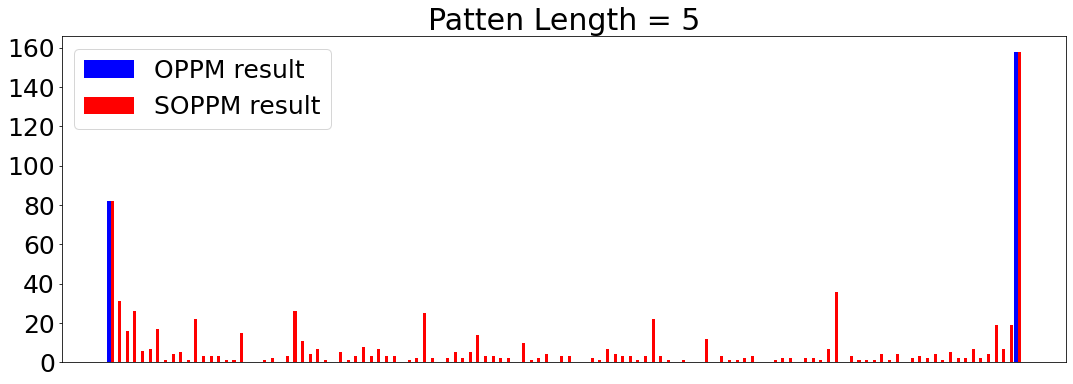

In [5]:
# 그래프 그리기
for k in range(len(k_values)):
    fig = plt.figure(figsize=(18, 6))
    
    x = np.arange(len(pattern_data_list[k]))
    
    # 첫 번째 그래프 (막대그래프)
    plt.bar(x - 0.2, oppm_data_list[k], width=0.4, label='OPPM result', color='b')

    # 두 번째 그래프 (막대그래프)
    plt.bar(x + 0.2, soppm_data_list[k], width=0.4, label='SOPPM result', color='r')

    # 그래프에 카테고리 레이블 추가
    if k <= 1:
        plt.xticks(x, pattern_data_list[k], fontsize=25)
    else:
        plt.xticks([], [])
    plt.yticks(fontsize=25)

    # 그래프 제목 및 범례 설정
    plt.title(f'Patten Length = {k_values[k]}', fontsize=30)
    plt.legend(fontsize=25)

    # 그래프 표시
    plt.savefig(f"result/l={k+2}.png")
    plt.show()
